# Análise exploratória dos dados do SISU (2019 - 2022)

In [2]:
import psycopg2 as pspg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter 
from scipy import stats
import dask.dataframe as dd
import sqlalchemy as sql
CONN = pspg.connect(database='notas', user='dev', password='dev', host='localhost', port='5030')

## Analisando o fato `nota`

criando um dataframe consultando os valores de notas no banco de dados:

In [3]:
df = pd.read_sql('''
  select 
    id,
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte
  from sisu_nota sd
  tablesample bernoulli(15)
  ''', con=CONN)

/tmp/ipykernel_259563/1794695351.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


verificando os tipos de valores existentes no data frame:

In [4]:
df.dtypes

id                    int64
peso_l              float64
peso_ch             float64
peso_cn             float64
peso_m              float64
peso_r              float64
nota_minima_l       float64
nota_minima_ch      float64
nota_minima_cn      float64
nota_minima_m       float64
nota_minima_r       float64
media_minima        float64
nota_l              float64
nota_ch             float64
nota_cn             float64
nota_m              float64
nota_r              float64
nota_l_com_peso     float64
nota_ch_com_peso    float64
nota_cn_com_peso    float64
nota_m_com_peso     float64
nota_r_com_peso     float64
nota_candidato      float64
nota_corte          float64
dtype: object

Verificando as amostras da tabela:

In [5]:
df.head()

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
0,12850170,1.0,1.0,1.0,1.0,1.0,300.0,300.0,300.0,300.0,...,585.2,578.5,640.0,631.7,612.1,585.2,578.5,640.0,609.50,665.28
1,12850181,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,503.6,543.8,640.0,591.2,591.5,503.6,543.8,640.0,574.02,607.50
2,12850183,2.0,2.0,4.0,4.0,1.0,350.0,350.0,350.0,350.0,...,535.9,533.1,600.0,1004.6,1248.2,2143.6,2132.4,600.0,548.37,644.74
3,12850188,2.0,1.0,3.0,1.0,3.0,400.0,400.0,400.0,400.0,...,484.0,417.7,420.0,1079.4,564.9,1452.0,417.7,1260.0,477.40,639.16
4,12850198,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,...,572.2,782.5,880.0,1223.8,648.2,572.2,2347.5,1760.0,873.56,856.92


In [6]:
df.tail()

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
2319945,12850095,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,588.6,708.9,700.0,608.6,679.1,588.6,708.9,700.0,657.04,658.72
2319946,12850096,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,499.6,636.4,600.0,568.1,597.8,499.6,636.4,600.0,580.38,584.22
2319947,12850100,1.5,1.0,3.0,2.5,2.0,400.0,400.0,400.0,400.0,...,541.0,567.8,540.0,839.4,649.2,1623.0,1419.5,1080.0,561.11,579.88
2319948,12850121,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,383.1,421.5,380.0,950.0,796.0,766.2,421.5,760.0,410.41,620.36
2319949,12850137,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,574.4,451.3,900.0,572.9,649.3,574.4,451.3,900.0,629.58,734.26


In [7]:
df.sample(n=5)

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
1097194,4694526,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,712.8,895.8,960.0,713.40,747.2,712.8,895.8,960.0,805.84,802.80
527608,895595,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,596.2,669.8,880.0,649.00,670.0,596.2,669.8,880.0,693.00,792.48
1060236,4448681,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,475.1,507.9,440.0,512.00,339.8,475.1,507.9,440.0,454.96,607.10
1059986,4446950,1.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,...,0.0,0.0,420.0,599.20,619.5,0.0,0.0,420.0,327.74,727.72
1746994,9024046,2.5,3.0,1.0,1.0,2.5,0.01,0.01,0.01,0.01,...,631.7,665.3,320.0,1461.25,1956.6,631.7,665.3,800.0,551.49,634.29


verificando o `shape` da tabela, para analisar quantas linhas o dataframe irá analisar:

In [8]:
df.shape

(2319950, 24)

chamando o método `describe`, afim de ter um panorama de algumas métricas principais do dataframe:

In [9]:
df.describe().round(3)

,id,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_minima_l,nota_minima_ch,nota_minima_cn,nota_minima_m,...,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato,nota_corte
count,2.319950e+06,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,...,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2319950.000,2316818.000
mean,7.727615e+06,1.848,1.610,1.738,1.675,1.916,97.467,95.427,94.029,95.266,...,507.758,554.652,642.954,995.434,893.776,891.809,938.862,1239.867,566.784,666.856
std,4.465907e+06,1.127,0.967,1.068,1.020,1.049,164.600,162.566,161.491,163.267,...,85.072,118.257,167.001,617.397,551.561,593.194,639.563,781.136,88.260,72.195
min,2.000000e+00,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,40.000,0.000,0.000,0.000,0.000,40.000,64.000,225.590
25%,3.859058e+06,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,...,446.000,462.200,540.000,542.500,541.100,479.900,508.000,640.000,502.060,614.840
50%,7.724267e+06,1.000,1.000,1.000,1.000,2.000,0.010,0.010,0.010,0.010,...,503.700,542.500,620.000,669.200,635.000,585.700,666.300,960.000,558.920,664.900
75%,1.160138e+07,2.000,2.000,2.000,2.000,3.000,150.000,150.000,120.000,120.000,...,565.500,639.200,760.000,1225.800,1148.750,1162.400,1177.400,1680.000,627.040,716.280
max,1.545829e+07,5.000,5.000,5.000,5.000,5.000,650.000,650.000,650.000,750.000,...,869.600,996.100,1000.000,4014.500,4120.000,4075.500,4942.000,5000.000,1015.970,952.510


a seguir, são exibidos histogramas dos valores das notas de cada área de conhecimento e a média de cada registro:

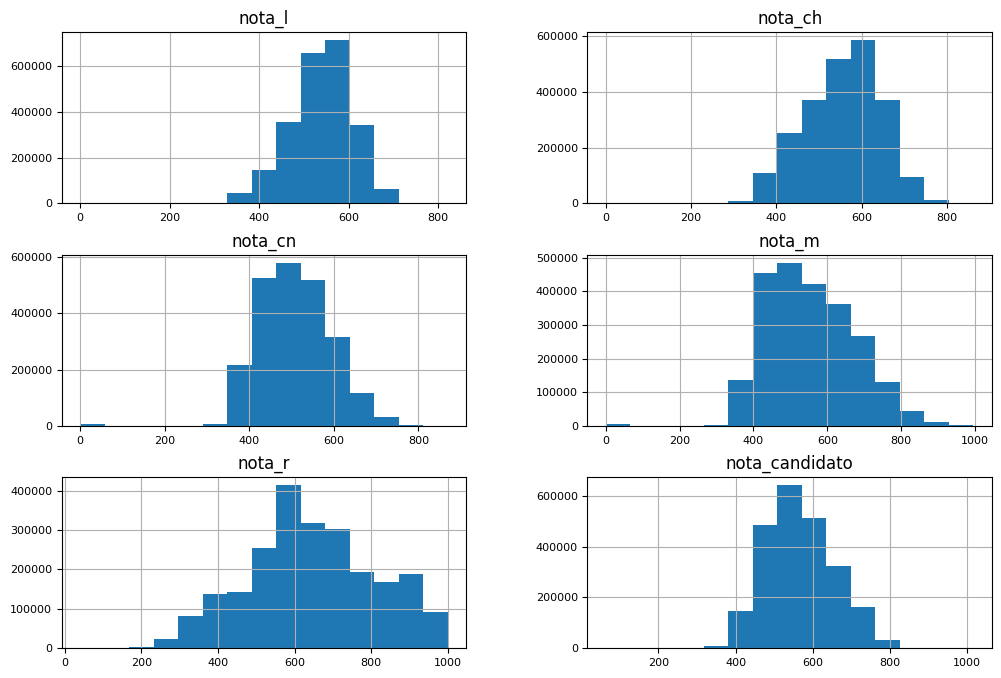

In [10]:

notas_sem_pesos = df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']]
notas_sem_pesos.hist(figsize=(12, 8), bins=15, xlabelsize=8, ylabelsize=8);

analisando os histogramas, chegamos a conclusão de que há uma distribuição assimétrica nas notas de redação, visto que os valores apresentam frequências maiores para notasa cima de 700 pontos em comparacão com as outras áreas de conhecimento. Também é possível perceber que a tendência das notas gerais é maior para valores entre 500 pontos e 600 pontos.

Agora analisando as correlações entre os valores do DataFrame:

<Axes: >

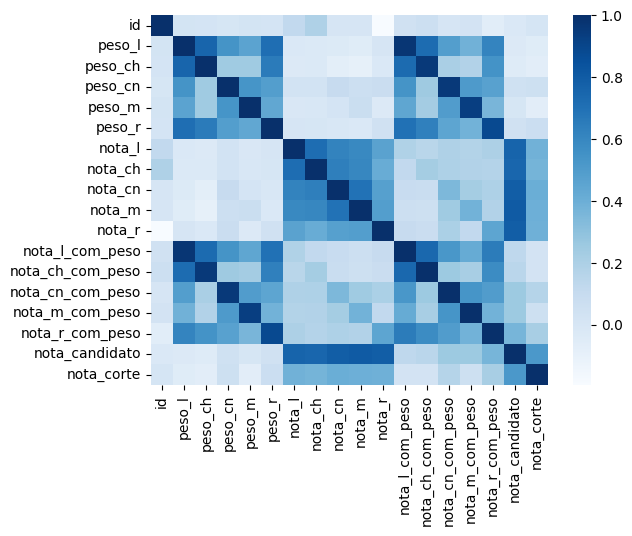

In [11]:
sns.heatmap(data=df.drop(columns=['nota_minima_l', 'nota_minima_ch', 'nota_minima_cn', 'nota_minima_m', 'nota_minima_r', 'media_minima']).corr(), cmap='Blues')

Podemos ver no gráfico que:
-  as notas `com_peso` possuem correlação forte com seus `pesos` e;
-  a `nota_candidato` possui forte correlação com as notas de cada área de conhecimento; 

Isso confirma que a `nota_candidato` é determinada pela média ponderada das notas de cada área de conhecimento, adotando os seus pesos.

A seguir, segue as correlacoes de cada valor com a `nota_candidato`:

In [12]:
df.corr()['nota_candidato'].sort_values(ascending=False)

nota_candidato      1.000000
nota_m              0.800050
nota_r              0.788043
nota_cn             0.786067
nota_l              0.760707
nota_ch             0.751142
nota_corte          0.517554
nota_r_com_peso     0.369688
nota_m_com_peso     0.254236
nota_cn_com_peso    0.253710
media_minima        0.184952
nota_minima_cn      0.182606
nota_minima_m       0.179621
nota_minima_l       0.179176
nota_minima_ch      0.176875
nota_minima_r       0.160928
nota_ch_com_peso    0.147374
nota_l_com_peso     0.129936
peso_cn             0.051743
peso_r              0.045095
peso_m              0.004169
id                 -0.017477
peso_l             -0.026418
peso_ch            -0.043126
Name: nota_candidato, dtype: float64

como os valores de `nota` são maiores que 0.75, podemos assumir que a correlação entre `nota_candidato` e as `notas` são fortes 

## Pela dimensão Tempo

criando um dataframe com os valores no banco de dados:

In [13]:
df = pd.read_sql('''
  select 
    sd.id,
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte,
    st.*
  from sisu_nota sd
  tablesample bernoulli(15)
  inner join sisu_tempo st on sd.dimensao_tempo = st.id
  ''', con=CONN)

/tmp/ipykernel_259563/2707234134.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


<Axes: xlabel='ano', ylabel='pontuacao'>

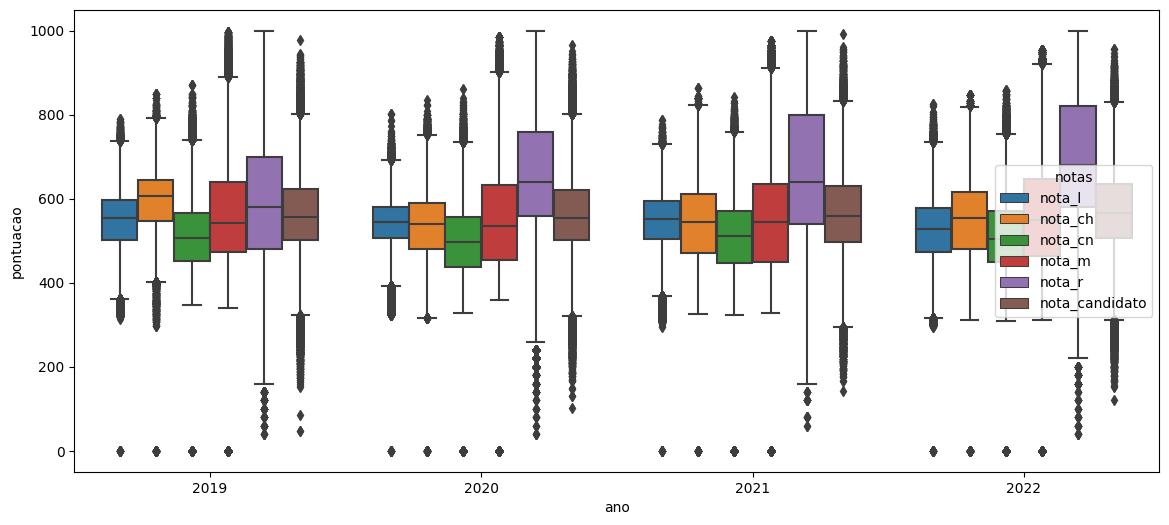

In [14]:
df_ano = df[['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato',
    'ano'
]]

df_ano = df_ano.melt(id_vars='ano', value_vars=['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato'
], var_name='notas', value_name='pontuacao')
plt.figure(figsize=(14, 6))
sns.boxplot(x='ano', y='pontuacao', hue='notas', data=df_ano, dodge=True)

In [15]:
df.dtypes

id                    int64
peso_l              float64
peso_ch             float64
peso_cn             float64
peso_m              float64
peso_r              float64
nota_minima_l       float64
nota_minima_ch      float64
nota_minima_cn      float64
nota_minima_m       float64
nota_minima_r       float64
media_minima        float64
nota_l              float64
nota_ch             float64
nota_cn             float64
nota_m              float64
nota_r              float64
nota_l_com_peso     float64
nota_ch_com_peso    float64
nota_cn_com_peso    float64
nota_m_com_peso     float64
nota_r_com_peso     float64
nota_candidato      float64
nota_corte          float64
id                    int64
ano                   int64
edicao                int64
codigo_etapa          int64
etapa                object
dtype: object

In [16]:
__df = df.groupby(by='edicao')
__df.count()['nota_candidato']

edicao
1    2013186
2     303749
Name: nota_candidato, dtype: int64

## Pela dimensão Candidato

In [17]:
df = pd.read_sql('''
  select 
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_minima_l,
    sd.nota_minima_ch,
    sd.nota_minima_cn,
    sd.nota_minima_m,
    sd.nota_minima_r,
    sd.media_minima,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    sd.nota_corte,
    sc.*
  from sisu_nota sd
  tablesample bernoulli(15)
  inner join sisu_candidato sc on sd.dimensao_candidato = sc.id
  ''', con=CONN)

/tmp/ipykernel_259563/2195650440.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


In [18]:
df.dtypes

peso_l                 float64
peso_ch                float64
peso_cn                float64
peso_m                 float64
peso_r                 float64
nota_minima_l          float64
nota_minima_ch         float64
nota_minima_cn         float64
nota_minima_m          float64
nota_minima_r          float64
media_minima           float64
nota_l                 float64
nota_ch                float64
nota_cn                float64
nota_m                 float64
nota_r                 float64
nota_l_com_peso        float64
nota_ch_com_peso       float64
nota_cn_com_peso       float64
nota_m_com_peso        float64
nota_r_com_peso        float64
nota_candidato         float64
nota_corte             float64
id                       int64
inscrito                object
sexo                    object
uf_candidato            object
municipio_candidato     object
matricula               object
data_nascimento         object
aprovado                  bool
opcao                    int64
dtype: o

In [19]:
groups = df.groupby(by='sexo')
# means = groups['nota_candidato'].mean()
# medians = groups['nota_candidato'].median()
# stds = groups['nota_candidato'].std()
# vars = groups['nota_candidato'].var()
groups['nota_candidato'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
F,1399967.0,561.471,87.762,120.0,496.87,551.92,621.18,990.17
M,917797.0,574.884,88.197,60.0,510.88,569.44,634.61,995.40


In [20]:
#TODO: test t student

In [21]:
groups = df.groupby(by='uf_candidato')
describer = groups['nota_candidato'].describe().round(3).reset_index()
describer

,uf_candidato,count,mean,std,min,25%,50%,75%,max
0,AC,17640.0,545.883,90.172,207.60,477.028,534.570,606.730,898.97
1,AL,52568.0,533.329,82.665,191.41,473.715,521.660,581.682,894.89
2,AM,34879.0,534.470,78.492,167.33,478.840,526.540,582.455,852.34
3,AP,14139.0,541.296,89.904,214.42,475.875,524.100,593.755,930.77
4,BA,184458.0,551.151,81.498,131.10,491.740,543.160,604.800,903.08
5,CE,146354.0,568.264,88.822,200.53,503.300,559.380,627.680,955.15
6,DF,44299.0,578.386,88.541,227.79,513.290,571.850,640.240,892.03
7,ES,49239.0,578.026,87.914,161.45,515.140,572.630,638.190,871.07
8,GO,69506.0,572.376,89.670,176.46,505.580,564.935,635.470,924.24
9,MA,105597.0,545.745,93.354,60.00,478.360,530.110,597.360,995.40


<Axes: xlabel='uf_candidato', ylabel='count'>

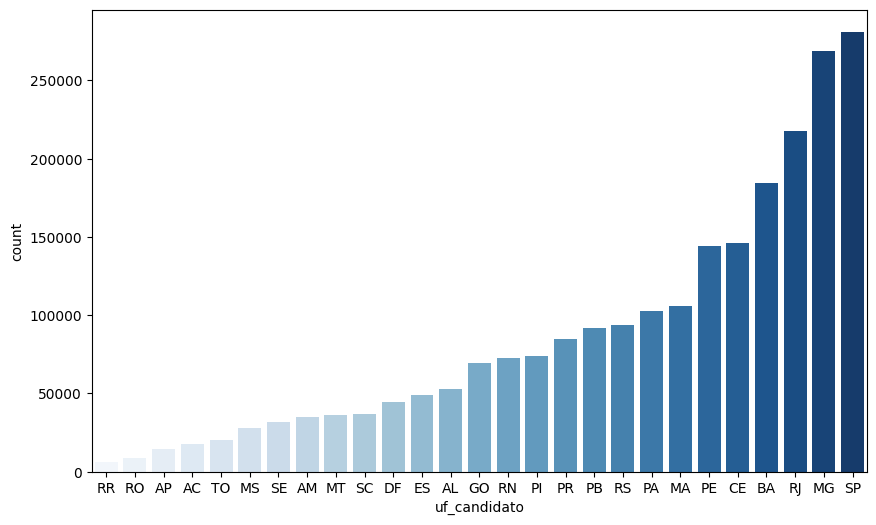

In [22]:
plt.figure(figsize=(10,6))
sns.set_palette('Blues')
sns.barplot(x='uf_candidato', y='count', data=describer.sort_values(by='count'), palette='Blues')

<Axes: xlabel='uf_candidato', ylabel='mean'>

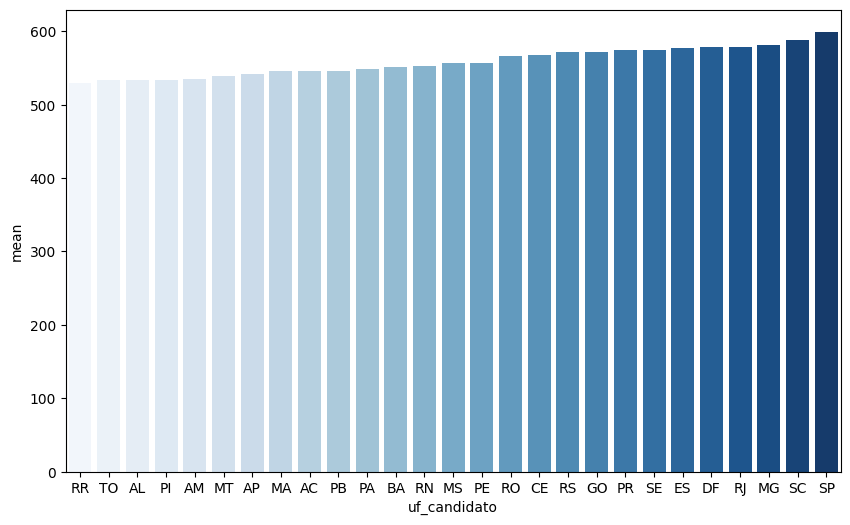

In [23]:
plt.figure(figsize=(10,6))
sns.set_palette('Blues')
sns.barplot(x='uf_candidato', y='mean', data=describer.sort_values(by='mean'), palette='Blues')

In [24]:
describer.sort_values(by='mean', ascending=False)[['uf_candidato', 'mean']].reset_index()

,index,uf_candidato,mean
0,25,SP,599.737
1,23,SC,588.867
2,10,MG,581.147
3,18,RJ,578.443
4,6,DF,578.386
5,7,ES,578.026
6,24,SE,574.543
7,17,PR,574.255
8,8,GO,572.376
9,22,RS,572.051


In [25]:
p_values = []
stats_values = []
ufs = df['uf_candidato'].unique()

for uf in ufs:
    uf_data = df[df['uf_candidato'] == uf]['nota_candidato']
    stat, p = stats.shapiro(uf_data)
    p_values.append(p)
    stats_values.append(stat)

shapiro_df = pd.DataFrame({
    'uf': ufs,
    'p': p_values,
    'stat': stats_values
})

shapiro_df.round(7)

/home/gustavo/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,uf,p,stat
0,RJ,0.0,0.994352
1,MG,0.0,0.993762
2,DF,0.0,0.992426
3,ES,0.0,0.993511
4,MT,0.0,0.982831
5,PE,0.0,0.984508
6,RS,0.0,0.993415
7,SC,0.0,0.995661
8,SP,0.0,0.997076
9,PA,0.0,0.979826


In [26]:
print('h0: as médias dos grupos são iguais')

stat, p = stats.kruskal(*[group['nota_candidato'].values for name, group in groups])

print(f"Resultado do teste de Kruskal-Wallis: statistic={stat:.4f}, p-value={p:.4f}")

if p < 0.01:
    print('hipótese nula rejeitada')
else:
    print('hipótese nula confirmada')

h0: as médias dos grupos são iguais
Resultado do teste de Kruskal-Wallis: statistic=124818.5355, p-value=0.0000
hipótese nula rejeitada


<Axes: xlabel='uf_candidato', ylabel='nota_candidato'>

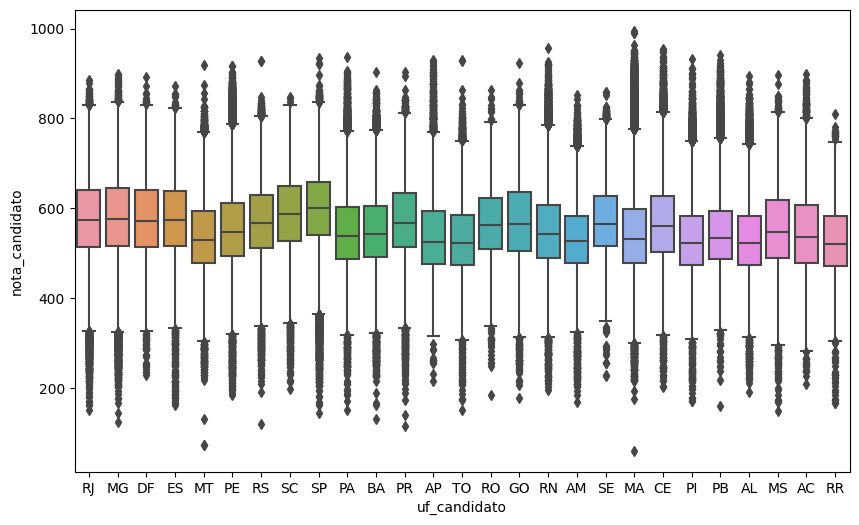

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='uf_candidato', y='nota_candidato', data=df, )